####  There are a problem for project_2 --  bbox hasn't been created when I finished.
#### Do you know it ??  ( I guess that there are so many bad matches. )

In [1]:
import math
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./data/lena.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# plt.imshow(img)

### Gaussian Kernel Effect

In [4]:
# 图像变更模糊，因为范围更大，平均效果更明显
blur_img = cv2.GaussianBlur(img, (17, 17), 5)  # kernel, sigma

In [5]:
# plt.figure(figsize=(80, 100))
# plt.subplot(1,2,1), plt.imshow(img)
# plt.subplot(1,2,2), plt.imshow(blur_img)

In [6]:
# # 图像更清晰，因为方差更小，高斯图像更尖锐，中心点起的作用更大
# sharp_img = cv2.GaussianBlur(img, (17, 17), 1)
# plt.figure(figsize=(80, 100))
# plt.subplot(1,2,1), plt.imshow(img)
# plt.subplot(1,2,2), plt.imshow(sharp_img)

### 加速卷积速度，减少运算量  (3x3) 9 -> 6 (3+3)

In [7]:
kernel = cv2.getGaussianKernel(7, 5)
kernel

array([[0.12895603],
       [0.14251846],
       [0.15133131],
       [0.1543884 ],
       [0.15133131],
       [0.14251846],
       [0.12895603]])

### 用显式地代码看隐式地高斯和显示地分步高斯地效果

In [8]:
g1_img = cv2.GaussianBlur(img, (7, 7), 5)
g2_img = cv2.sepFilter2D(img, -1, kernel, kernel) # depth kernelX kernelY

In [9]:
# plt.figure(figsize=(80, 100))
# plt.subplot(1,2,1), plt.imshow(g1_img)
# plt.subplot(1,2,2), plt.imshow(g2_img)

### 双边滤波： 让平滑的地方更平滑，锐利的地方更锐利
#### 2nd derivative:  laplacian (双边缘效果)

In [10]:
kernel_lap = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel=kernel_lap)

In [11]:
# plt.figure(figsize=(80, 100))
# plt.subplot(1,2,1), plt.imshow(img)
# plt.subplot(1,2,2), plt.imshow(lap_img)

In [12]:
# 应用： 图像锐化 = edge+ori
# app: sharpen
# 图像+edge=更锐利地图像，因为突出边缘
kernel_sharp = np.array([[0, 1, 0], [1, -3, 1], [0, 1, 0]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel=kernel_sharp)

In [13]:
# plt.figure(figsize=(80, 100))
# plt.subplot(1,2,1), plt.imshow(img)
# plt.subplot(1,2,2), plt.imshow(lap_img)

In [14]:
# 这样不对，因为，周围有4个1，中间是-3，虽然有边缘效果，但是周围得1会使得原kernel有滤波效果，使图像模糊；
# 解决：所以取kernel_lap得相反数，再加上原图像，这样突出了中心像素，效果类似于小方差的高斯，所以
#      可以既有边缘效果，又保留图像清晰度
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel=kernel_sharp)

In [15]:
# plt.figure(figsize=(80, 100))
# plt.subplot(1,2,1), plt.imshow(img)
# plt.subplot(1,2,2), plt.imshow(lap_img)

In [16]:
# 更“凶猛”的边缘效果
# 不仅考虑x-y方向上的梯度，同时考虑了对角线方向上的梯度
kernel_sharp = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel_sharp)

In [17]:
# plt.figure(figsize=(80, 100))
# plt.subplot(1,2,1), plt.imshow(img)
# plt.subplot(1,2,2), plt.imshow(lap_img)

### Edge  ( Sobel 算子)

In [18]:
# x 轴
edgeX = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
edgeY = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
sharp_X = cv2.filter2D(img, -1, kernel=edgeX)
sharp_Y = cv2.filter2D(img, -1, kernel=edgeY)

In [19]:
# plt.figure(figsize=(40, 50))
# plt.subplot(131), plt.title("edge_X"), plt.imshow(sharp_X)
# plt.subplot(132), plt.title("source"), plt.imshow(img)
# plt.subplot(133), plt.title("edge_Y"), plt.imshow(sharp_Y)

### 角点检测

In [20]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.float32(img_gray)
harries = cv2.cornerHarris(img_gray, 2, 3, 0.05)
# 为了让图片的显示更加明显，使用膨胀 （图像形态学）
dilate_harries = cv2.dilate(harries, None)

In [21]:
# plt.figure(figsize=(40, 50))
# plt.subplot(1,3,1), plt.imshow(img)
# plt.subplot(1,3,2), plt.imshow(harries)
# plt.subplot(1,3,3), plt.imshow(dilate_harries)

#### 无法很好的显示数据？？  为了显示更加清晰明显

In [22]:
print(harries)

[[ 2.0232228e+05  2.0232228e+05  2.1955844e+05 ... -3.2207703e+05
  -5.4513875e+05 -9.0883219e+05]
 [ 2.0232228e+05  2.0232228e+05  2.1955844e+05 ... -3.2207703e+05
  -5.4513875e+05 -9.0883219e+05]
 [-2.8974550e+05 -2.8974550e+05 -4.3225625e+03 ... -7.0355400e+05
   5.2169875e+05  3.0913025e+05]
 ...
 [-5.6422725e+06 -5.6422725e+06 -1.4873921e+07 ...  8.2713391e+02
  -1.1356926e+03 -1.1230946e+03]
 [-5.9972325e+06 -5.9972325e+06 -1.5715921e+07 ...  6.9830933e+02
  -2.3970627e+02 -4.4621954e+02]
 [-6.1391670e+06 -6.1391670e+06 -1.5987310e+07 ...  1.5121870e+02
   1.0863817e+01 -1.1262501e+01]]


In [23]:
thres = 0.05 * np.max(harries)
new_img = img.copy()
new_img[harries > thres] = [0, 0, 255]

In [24]:
# plt.figure(figsize=(80, 100))
# plt.subplot(131), plt.imshow(img)
# plt.subplot(132), plt.imshow(new_img)

### SIFT

In [26]:
sift = cv2.xfeatures2d.SIFT_create()
matcher = cv2.BFMatcher()

kp_1 = sift.detect(img, None)
kp_1, des_1 = sift.compute(img, kp)
kp_2, des_2 = sift.detectAndCompute(img, None)

img_sift = cv2.drawKeypoints(img,
                             kp,
                             outImage=np.array([]),
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
sift_matches = matcher.match(des_1, des_2)
match_res = cv2.drawMatches(img, kp_1, img, kp_2, sift_matches, outImg=np.array([]))

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [27]:
print("descriptor shape:", des.shape, " descriptor size", sift.descriptorSize())
# plt.figure(figsize=(40, 50))
# plt.subplot(131), plt.imshow(img)
# plt.subplot(132), plt.imshow(img_sift)
# plt.subplot(133), plt.imshow(match_res)

NameError: name 'des' is not defined

### SURF

In [28]:
surf = cv2.xfeatures2d.SURF_create(400) # threshold
matcher = cv2.BFMatcher()
kp_res = np.zeros_like(img, dtype=np.float32)    # or np.array([])
match_res = np.zeros_like(img, dtype=np.float32) # or np.array([])

kp_1, des_1 = surf.detectAndCompute(img, None)  # kp = surf.detect()
kp_2, des_2 = surf.detectAndCompute(img, None)
matches = matcher.match(des_1, des_2)

kp_res = cv2.drawKeypoints(img, kp_1, kp_res)
match_res = cv2.drawMatches(img, kp_1, img, kp_2, matches, match_res)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [29]:
print("number of descriptor", surf.descriptorSize())
# plt.figure(figsize=(40, 50))
# plt.subplot(131), plt.imshow(img)
# plt.subplot(132), plt.imshow(kp_res)
# plt.subplot(133), plt.imshow(match_res)

NameError: name 'surf' is not defined

### ORB

In [30]:
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.HAMMING_NORM_TYPE)

kp_1, des_1 = orb.detectAndCompute(img, None)
kp_2, des_2 = orb.detectAndCompute(img, None)
orb_matches = bf.match(des_1, des_2)

kp_img = cv2.drawKeypoints(img, kp_1, outImage=np.array([]))
match_img = cv2.drawMatches(img, kp_1, img, kp_2, orb_matches, outImg=np.array([]))

AttributeError: module 'cv2.cv2' has no attribute 'HAMMING_NORM_TYPE'

In [31]:
# plt.figure(figsize=(40, 50))
# plt.subplot(131), plt.imshow(img)
# plt.subplot(132), plt.imshow(kp_img)
# plt.subplot(133), plt.imshow(match_img)

### HOG

In [32]:
# 1. 读取图片
img = cv2.imread('./data/lena.bmp', 0)

# 2. 归一化 ( gamma校正 )
normalized_img = np.sqrt( img / float(np.max(img)) - np.min(img) )

In [33]:
# plt.figure(figsize=(40, 50))
# plt.subplot(121), plt.imshow(img)
# plt.subplot(122), plt.imshow(normalized_img)

In [34]:
# 3. 计算图像每个像素的梯度（包括大小和方向），捕获轮廓信息
#                                       x  y  kernel_size
gradient_x = cv2.Sobel(normalized_img, cv2.CV_64F, 1, 0, ksize=5)
gradient_y = cv2.Sobel(normalized_img, cv2.CV_64F, 0, 1, ksize=5)
# dst(I)=saturate(src1(I)∗alpha+src2(I)∗beta+gamma)
gradient_magnitude = cv2.addWeighted(gradient_x, 0.5, gradient_y, 0.5, 0.5)
# angle(I)=atan2(y(I),x(I))
gradient_angle = cv2.phase(gradient_x, gradient_y, angleInDegrees=True)

print(gradient_magnitude.shape, gradient_angle.shape)

(502, 502) (502, 502)


In [35]:
# 4. 为每个细胞单元构建梯度方向直方图
h, w = img.shape
cell_size = 8
bin_size = 8
angle_unit = 360 / bin_size
gradient_magnitude = np.abs(gradient_magnitude)
cell_gradient_vector = np.zeros((int(h / cell_size), int(w / cell_size), bin_size))

print("cell:", cell_gradient_vector.shape)

def cell_gradient(cell_magnitude, cell_angle):
    # 梯度直方图  (8 x 1)
    orientation_centers = [0] * bin_size
    
    for y in range(cell_magnitude.shape[0]):
        for x in range(cell_magnitude.shape[1]):
            gradient_strength = cell_magnitude[y][x]
            gradient_angle = cell_angle[y][x]
            
            # 构建梯度直方图                       40            8
            min_angle = int(gradient_angle / angle_unit) % bin_size
            max_angle = (min_angle + 1) % bin_size
            mod = gradient_angle % angle_unit
            
            orientation_centers[min_angle] += gradient_strength * (1 - (mod / angle_unit))
            orientation_centers[max_angle] += gradient_strength * (mod / angle_unit)
            
    return orientation_centers

for i in range(cell_gradient_vector.shape[0]):  # number of cell in x axis
    for j in range(cell_gradient_vector.shape[1]):  # number of cell in y axis
        cell_magnitude = gradient_magnitude[i*cell_size: (i+1)*cell_size, 
                                            j*cell_size: (j+1)*cell_size]
        cell_angle = gradient_angle[i*cell_size: (i+1)*cell_size,
                                    j*cell_size: (j+1)*cell_size]
        
        cell_gradient_vector[i][j] = cell_gradient(cell_magnitude, cell_angle)

cell: (62, 62, 8)


In [36]:
# 5.可视化直方图
hog_img = np.zeros([h, w])
cell_width = cell_size / 2
cell_gradient_vector = np.array(cell_gradient_vector)
max_mag = np.max(cell_gradient_vector)

for y in range(cell_gradient_vector.shape[0]):
    for x in range(cell_gradient_vector.shape[1]):
        cell_grad = cell_gradient_vector[y][x]

        cell_grad /=  max_mag
        angle = 0
        angle_gap = angle_unit  # 40  用于将直方图的角度还原至原来的值
        for magnitude in cell_grad:
            angle_randian= math.radians(angle)  # 将角度值转换成弧度值
            x1= int(x * cell_size + magnitude * cell_width * math.cos(angle_randian))
            y1= int(y * cell_size + magnitude * cell_width * math.sin(angle_randian))
            x2= int(x * cell_size - magnitude * cell_width * math.cos(angle_randian))
            y2= int(y * cell_size - magnitude * cell_width * math.sin(angle_randian))

            hog_img = cv2.line(hog_img, (x1, y1), (x2, y2),
                               int(255 * math.sqrt(magnitude)))
            angle += angle_gap

In [37]:
# plt.imshow(hog_img)

### FLANN && RANSAC

In [38]:
img_1 = cv2.imread('./data/dog.jpg', 0)
img_2 = cv2.imread('./data/dog.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img_1, None)
kp2, des2 = sift.detectAndCompute(img_2, None)

#                  kd-tree
indexParams = dict(algorithm=0, trees=5)
searchParams = dict(checks=5)

flann = cv2.FlannBasedMatcher(indexParams, searchParams)
matches = flann.knnMatch(des1, des2, k=2)  # k des1中一个描述子在des2中最多对应着k个描述子

good_matches = []
for m, n in matches:  # 筛选出一些比较好的匹配结果  m: src descriptors  n: dst descriptors
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
        
# 好的描述子的数量不小于20， 否则不匹配
print("good =",len(good_matches))
if len(good_matches) > 20:
    print("size for good matches:", len(good_matches))
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape([-1, 1, 2])
    dst_pts = np.float32([kp2[n.trainIdx].pt for n in good_matches]).reshape([-1, 1, 2])
    
    # 用 ransac 匹配的方法找到单应矩阵                            ransac threshold
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    print("M:", M.shape, "mask:", mask.shape)
    matches_mask = mask.ravel().tolist()
    
    # 通过对原图像的特征点进行单应变换，找到在目标图像对应的特征点
    h, w = img_1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape([-1, 1, 2])
    dst = cv2.perspectiveTransform(pts, M)
    
    # polylines： 绘制多边形
    img_2 = cv2.polylines(img_2, np.int32([dst]), True, 255, 3, cv2.LINE_AA)
    
else:
    print("Not Enough")
    matches_mask = None
    
drawParams = dict(matchColor=(0, 0, 255),
                  singlePointColor=None,
                  matchesMask=matches_mask,
                  flags=2 )

res_img = cv2.drawMatches(img_1, kp1, img_2, kp2, good_matches, None, **drawParams)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [39]:
# plt.imshow(res_img)

### BilateralFilter

$$
w(i, j, k, l)=\exp \left(-\frac{(i-k)^{2}+(j-l)^{2}}{2 \sigma_{d}^{2}}-\frac{\|I(i, j)-I(k, l)\|^{2}}{2 \sigma_{r}^{2}}\right)
$$

$$I_{D}(i, j)=\frac{\sum_{k, l} I(k, l) w(i, j, k, l)}{\sum_{k, l} w(i, j, k, l)}$$

In [40]:
# 相对于维纳滤波或者高斯滤波去降噪, 双边滤波能够 “边缘保存“
#                    每个像素邻域的直径  sigmaColor sigmaSpace
out_img = cv2.bilateralFilter(img, 3,     140,    140)

In [42]:
# plt.figure(figsize=(80,100))
# plt.subplot(121), plt.imshow(img)
# plt.subplot(122), plt.imshow(out_img)

## project 1: image stitching

In [43]:
right = cv2.imread('./data/left.jpg')
left = cv2.imread('./data/right.jpg')
h, w, c = right.shape
# h,w = right.shape
print(left.shape, right.shape)

M = cv2.getRotationMatrix2D((h/2, w/2), 5, 0.8)
rot_right = cv2.warpAffine(right, M, (int(w), int(h)))

(540, 720, 3) (540, 720, 3)


In [44]:
# plt.figure(figsize=(40, 50))
# plt.subplot(131), plt.imshow(left)
# plt.subplot(132), plt.imshow(right)
# plt.subplot(133), plt.imshow(rot_right)

In [45]:
''' 图像拼接 OpenCV版 '''
# 底层用的是surf
is_use_gpu = False
stitcher = cv2.createStitcher(is_use_gpu) 
status, res = stitcher.stitch([left, rot_right])

' 图像拼接 OpenCV版 '

AttributeError: module 'cv2.cv2' has no attribute 'createStitcher'

In [46]:
# if not status:
#     plt.figure(figsize=(80, 100))
#     plt.imshow(res)

## project 2: object detection

#### need help: why  bbox hasn't been created ？？？

<Figure size 2880x3600 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6843e66780>,
 <matplotlib.image.AxesImage at 0x7f6843d07710>)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6843d3c630>,
 <matplotlib.image.AxesImage at 0x7f684019e048>)

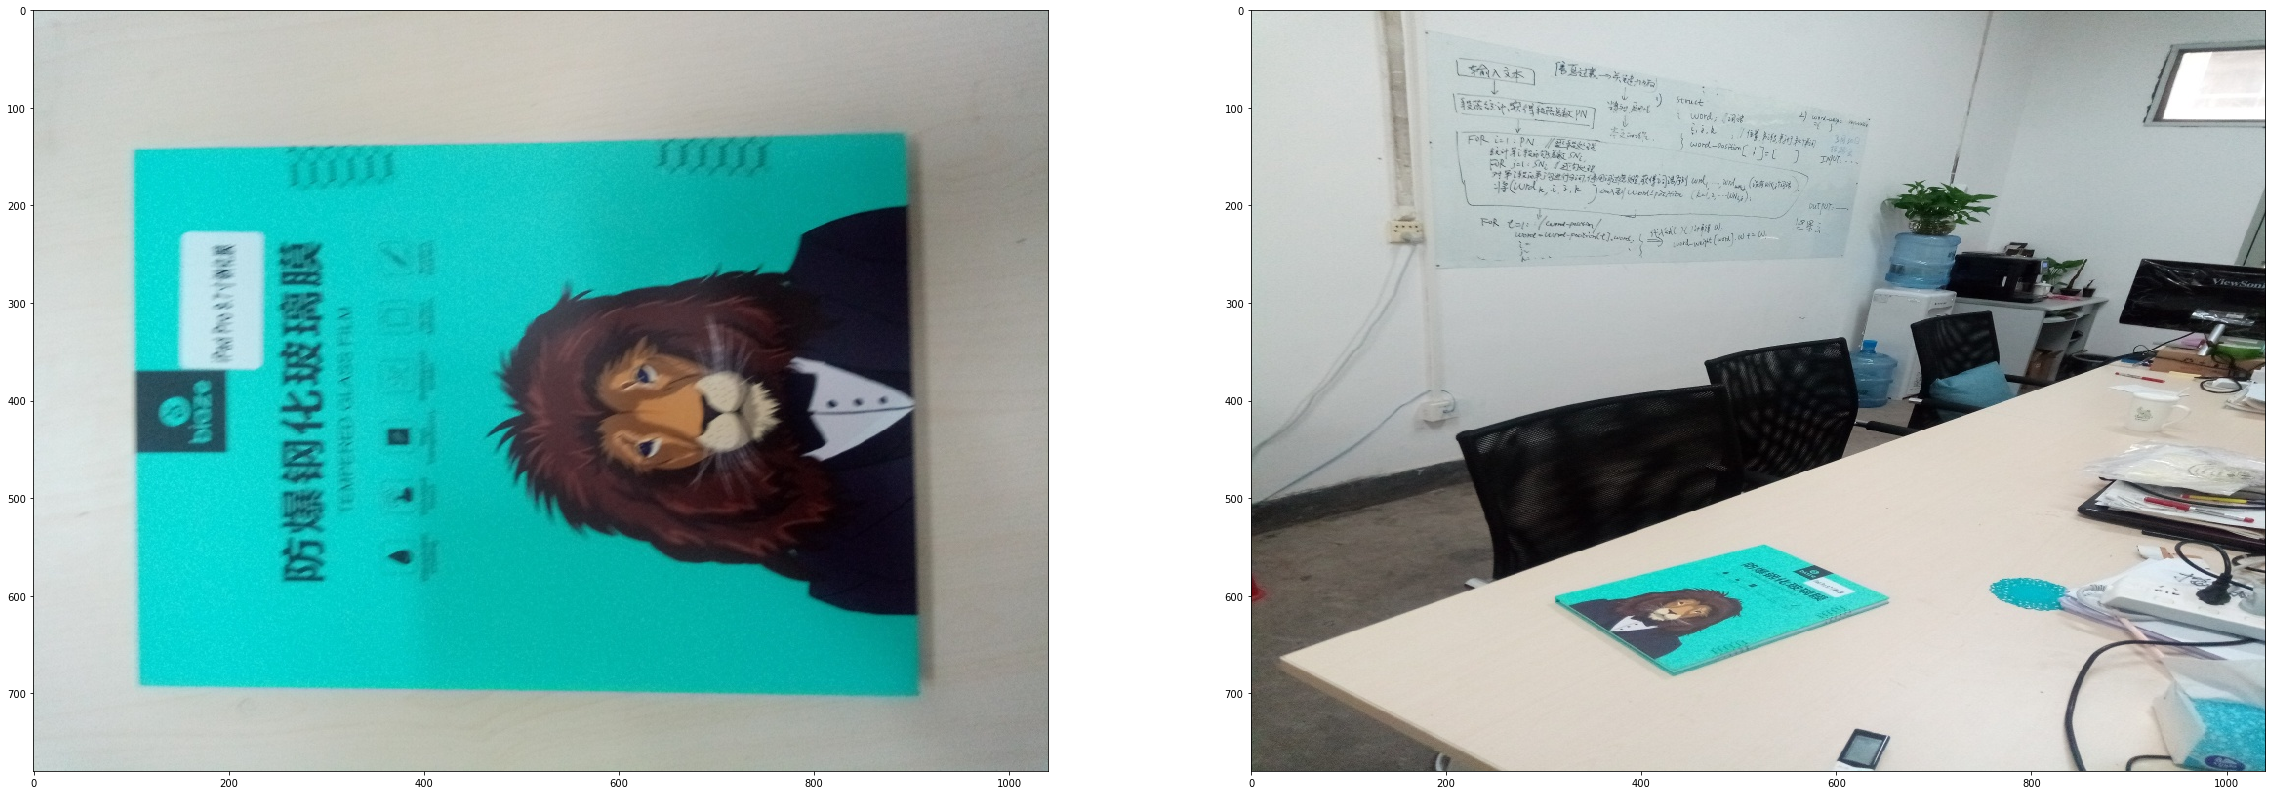

In [9]:
obj = cv2.cvtColor(cv2.imread('./data/match_0.jpg'), cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(cv2.imread('./data/match_1.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(40, 50))
plt.subplot(121), plt.imshow(obj)
plt.subplot(122), plt.imshow(dst)

bbox 1: 
 [[0.00e+00 0.00e+00 1.00e+00]
 [0.00e+00 1.04e+03 1.00e+00]
 [7.80e+02 1.04e+03 1.00e+00]
 [7.80e+02 0.00e+00 1.00e+00]]
bbox 2: 
 [[0.00e+00 0.00e+00 7.80e+02 7.80e+02]
 [0.00e+00 1.04e+03 1.04e+03 0.00e+00]
 [1.00e+00 1.00e+00 1.00e+00 1.00e+00]]
3
not enought


(<Figure size 5760x7200 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f67e42b1710>)

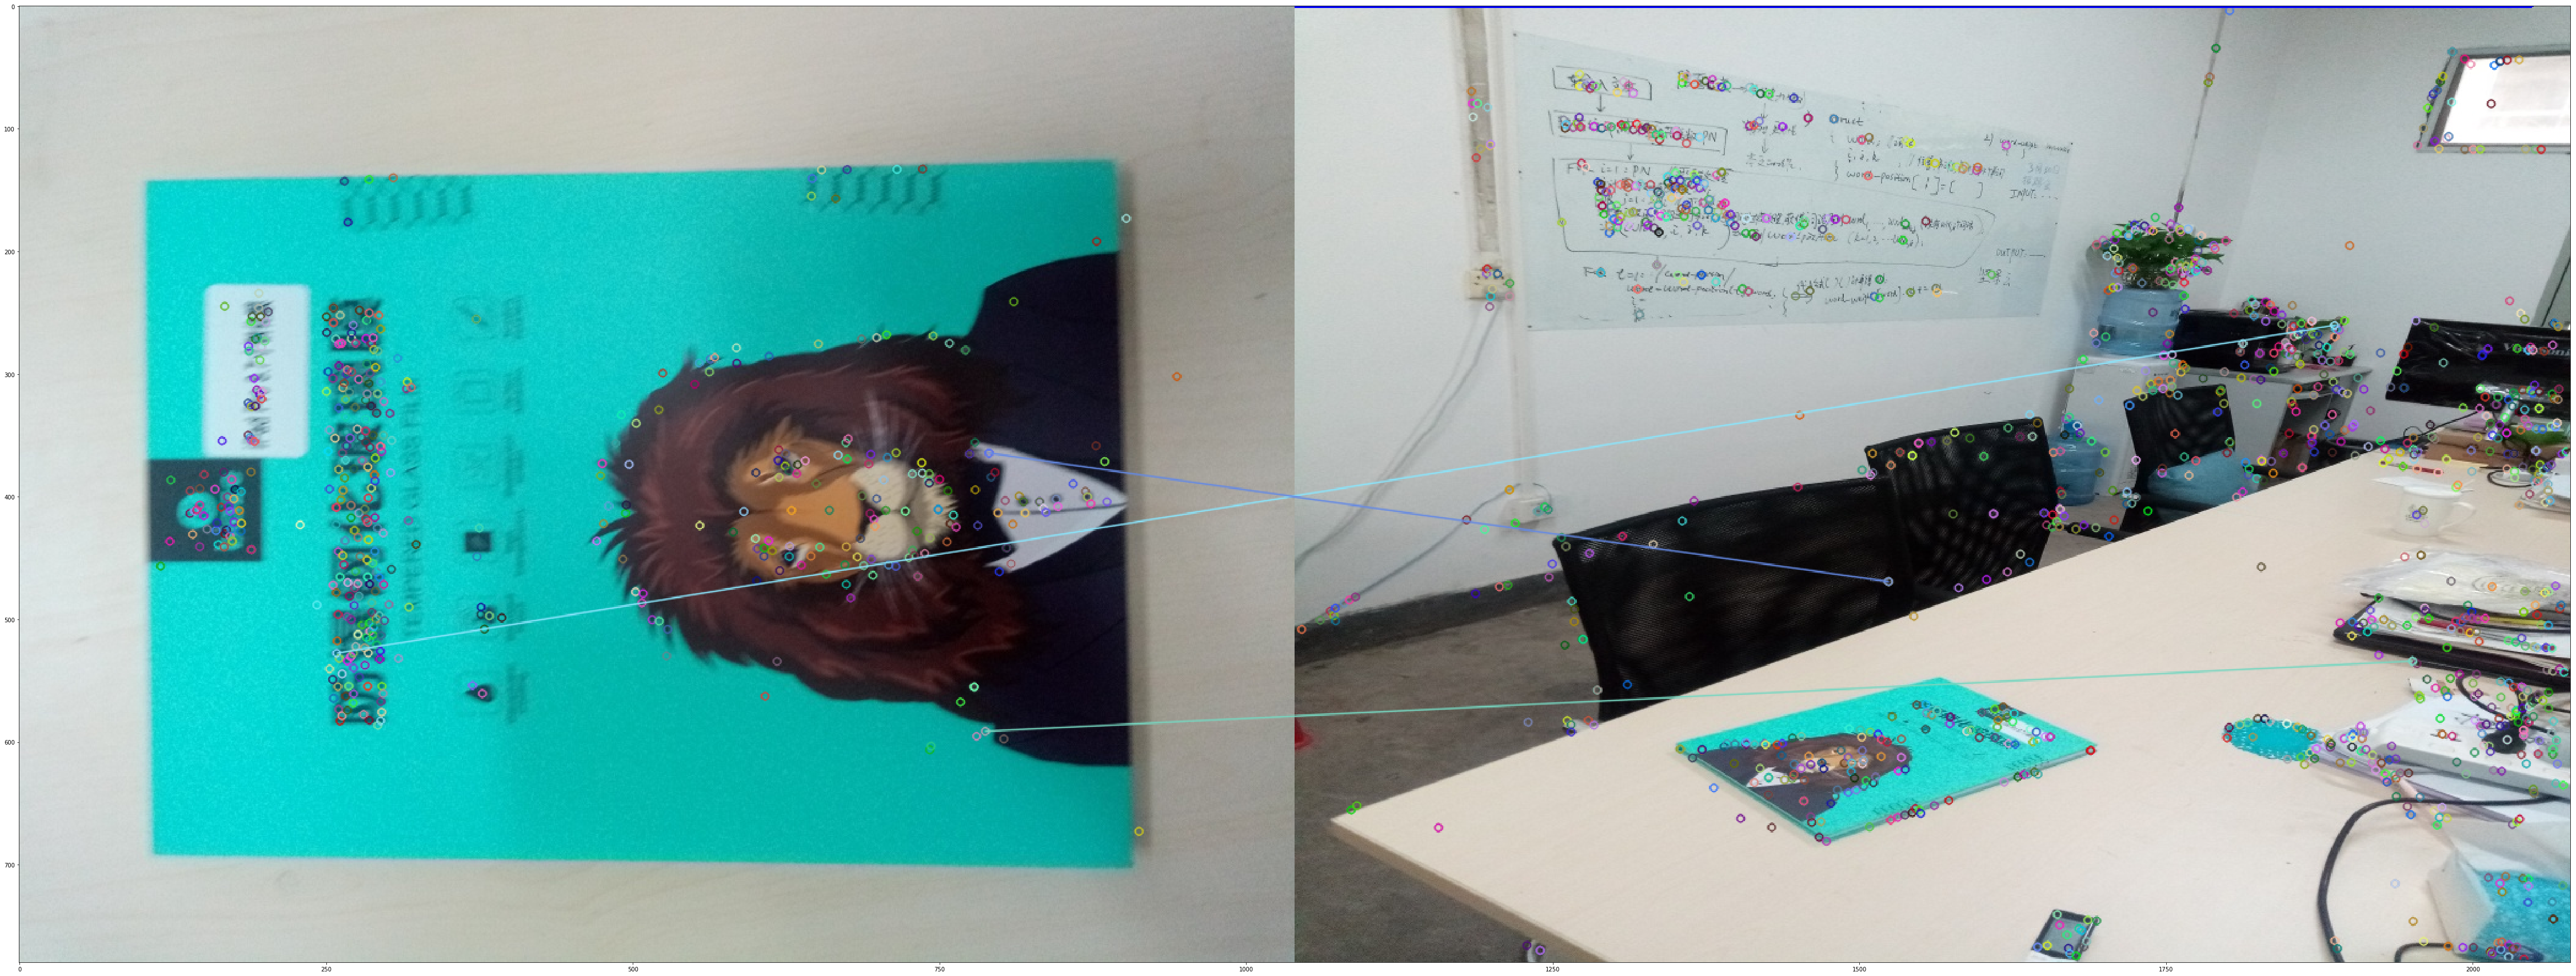

In [54]:
w, h, _ = obj.shape

bbox = np.array([[0, 0, 1],  # 顺序 对否？？
                 [0, h, 1],
                 [w, h, 1],
                 [w, 0, 1]], np.float32)
print('bbox 1: \n', bbox)
bbox = bbox.T
print('bbox 2: \n', bbox)

sift = cv2.xfeatures2d.SIFT_create()
# matcher = cv2.BFMatcher_create()

kp1, des1 = sift.detectAndCompute(obj, None)
kp2, des2 = sift.detectAndCompute(dst, None)
matches = matcher.match(des1, des2)

# 也可以用 knn 方法来处理
# max_dist = 9999
# min_dist = 0
# for i, _ in enumerate(des1):
#     dist = matches[i].distance
    
#     if dist < min_dist:        min_dist = dist
#     if dist > max_dist:        max_dist = dist

# good_matches = []
# for m in matches:
#     if m.distance < np.max([3*min_dist, 200]):
#         good_matches.append(m)
#                  kd-tree
indexParams = dict(algorithm=0, trees=5)
searchParams = dict(checks=5)

flann = cv2.FlannBasedMatcher(indexParams, searchParams)
matches = flann.knnMatch(des1, des2, k=2)  # k des1中一个描述子在des2中最多对应着k个描述子

good_matches = []
for m, n in matches:  # 筛选出一些比较好的匹配结果  m: src descriptors  n: dst descriptors
    if m.distance < 0.7 * n.distance:   # 越小，匹配要求越高，匹配结果越精确
        good_matches.append(m)

print(len(good_matches))
if len(good_matches) > 20:
    obj_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches])
    
    M, mask = cv2.findHomography(obj_pts, dst_pts, cv2.RANSAC)
    print('\n M 0:\n', M)
    trans_pts = np.dot(M, bbox).T
    print('\n trans_pts 0:\n', trans_pts)
    for i, p in enumerate(tran_pts):
        trans_pts[i] /= tran_pts[i][-1]
    p1 = (int(trans_pts[0][0]), int(tran_pts[0][1]))
    p2 = (int(trans_pts[3][0]), int(tran_pts[3][1]))
    print('\n trans_pts 1:\n', trans_pts)
    dst = cv2.rectangle(dst, p1, p2, (0, 0, 255), 2, 1)
    
else:
    M = np.zeros([3, 3])
    print("not enought")
# 找到变换坐标的矩阵 M (3, 3)
# 将目标的 bbox 映射到图片中
out = drawMatches(obj, kp1, dst, kp2, good_matches, np.array([]))

# trans_img = cv2.warpPerspective(obj, M, )
plt.figure(figsize=(80, 100)), plt.imshow(out)

## project 3: object tracking

In [20]:
'''
七种追踪器——opencv3.4   五中种追踪器——opencv3.1
TrackerBoosting_create()
TrackerMIL_create()
TrackerKCF_create()
TrackerTLD_create()
TrackerMedianFlow_create()
TrackerGOTURN_create()
TrackerMOSSE_create()
'''
# tracker = cv2.TrackerMOSSE_create()

def video2frames(cap, wp, name=""):
    
    rval, frame = cap.read()
    if not rval:
        print("Nothing be writed.")
    else:
        count = 0
        while rval:
            _ = cv2.imwrite(wp + (str(count) + name+'.png').zfill(10), frame)
            rval, frame = cap.read()
            count += 1

def frames2video(files, wp):
    pass

'\n七种追踪器——opencv3.4   五中种追踪器——opencv3.1\nTrackerBoosting_create()\nTrackerMIL_create()\nTrackerKCF_create()\nTrackerTLD_create()\nTrackerMedianFlow_create()\nTrackerGOTURN_create()\nTrackerMOSSE_create()\n'

In [16]:
video_path = './data/caffe_1.mp4'
cap = cv2.VideoCapture(video_path)

fps = cap.get(5)  # 视频频率
W_and_H = (cap.get(4), cap.get(5))

fp = './data/object_tracking_frames/'

video2frames(cap, fp)

wp = './results/object_tracking_results/'

frames = os.listdir(fp)
# w h begin(167, 170)  end(530, 700)
bbox = (170, 167, 700, 530)
# bbox = cv2.selectROI(fp+frames[0], False)  # 视频读取
frame = cv2.imread(fp + frames[0])
ok = tracker.init(frame, bbox)

count = 0
avg_ct = 0
for i, frame in enumerate(frames):
#     if i==0:
#         continue
    begin_time = cv2.getTickCount()

    frame = cv2.imread(fp + frame)
    ok, bbox = tracker.update(frame)
    
    end_time = cv2.getTickCount()
    avg_ct += (end_time - begin_time) / cv2.getTickFrequency()
    
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))  # begin point (h, w)
        p2 = (int(bbox[2]), int(bbox[3]))  # end point (h, w)
        res = cv2.rectangle(frame, p1, p2, (0, 0, 255), 2, 1)
        
        text1 = cv2.putText(frame, "Tracker: MOSSE", (100, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2)
        text2 = cv2.putText(frame, "FPS: MOSSE", (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2)
        
        w_t = cv2.imwrite(wp+(str(count)+'.png').zfill(7), frame)

print("average comsumed time:", avg_ct)

NameError: name 'tracker' is not defined